# Look at modes of Hollow Core slab waveguide at resonant input frequencies

Essentially the N1 Bragg fiber but in 1D.

In [1]:
import numpy as np
import matplotlib as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
from IPython.display import Video


In [2]:
A = SlabExact(scale=1e-6, ts=[1e-6, 2e-6, 6e-6, 2e-6, 1.1e-6],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 100, 200, 100, 100],
              symmetric=True, wl=.5e-6)

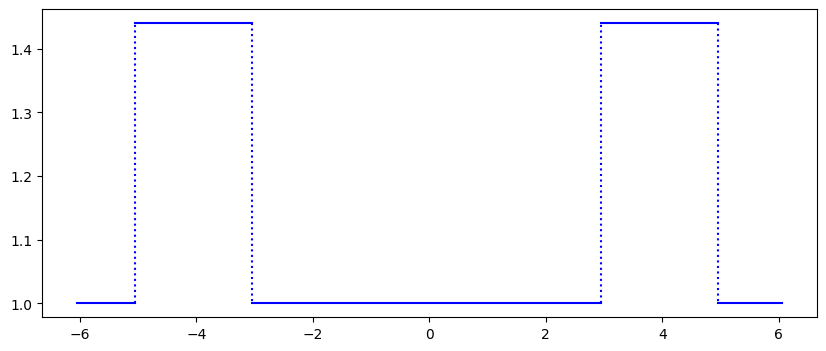

In [32]:
A.plot_refractive_index(figsize=(10,4))

In [61]:
field_type = 'TE'
mode_type = 'leaky'
k_low = A.K_low

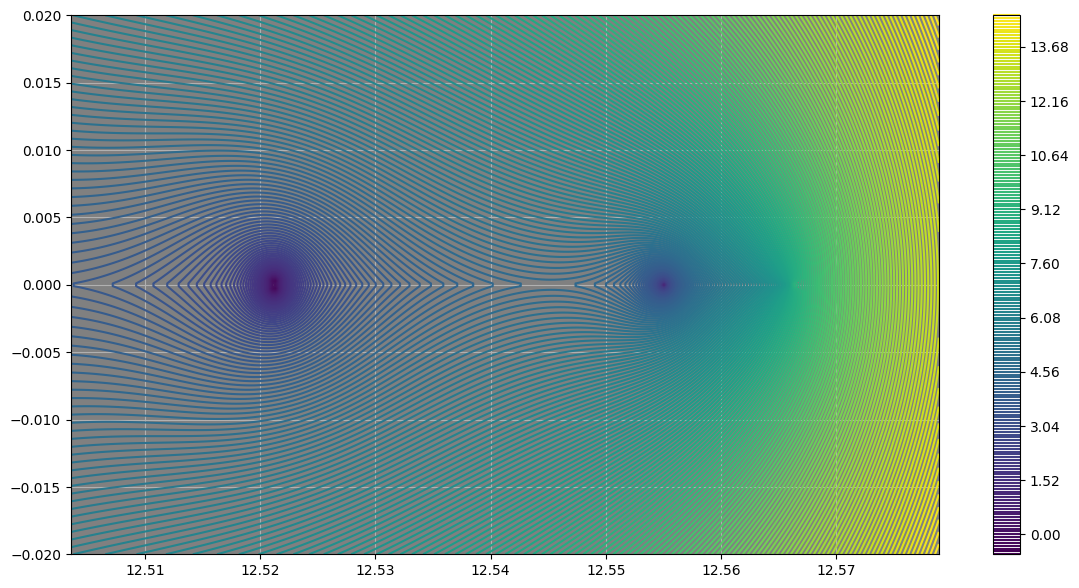

In [63]:
plotlogf(A.determinant, .995*k_low, 1.001*k_low, -.02, .02, field_type, mode_type, iref=200, rref=200,levels=200)

In [67]:
beta1 = newton(A.determinant, np.array([12.56-.001j]), args=('TM', mode_type))[0]
print(beta1, abs(A.determinant(beta1, 'TM', mode_type)))

beta2 = newton(A.determinant, np.array([12.52-.001j]), args=('TM', mode_type))[0]
print(beta2, abs(A.determinant(beta2, 'TM', mode_type)))

beta3 = newton(A.determinant, np.array([12.56-.001j]), args=('TE', mode_type))[0]
print(beta3, abs(A.determinant(beta3, 'TE', mode_type)))

beta4 = newton(A.determinant, np.array([12.52-.001j]), args=('TE', mode_type))[0]
print(beta4, abs(A.determinant(beta4, 'TE', mode_type)))

# beta1, beta2, beta3, beta4

(12.55455779812628-0.00017335702322193413j) 1.1662734095094413e-11
(12.51969218836465-0.001196404802242123j) 5.860445380562729e-12
(12.555030530371905-3.7549705505959455e-05j) 6.119773368574889e-11
(12.52119251677356-0.0002685652120149978j) 7.905408359421428e-11


In [69]:
Fs1 = A.fields(beta1, field_type='TM', mode_type=mode_type)
Fs2 = A.fields(beta2, field_type='TM', mode_type=mode_type)
Fs3 = A.fields(beta3, field_type='TE', mode_type=mode_type)
Fs4 = A.fields(beta4, field_type='TE', mode_type=mode_type)

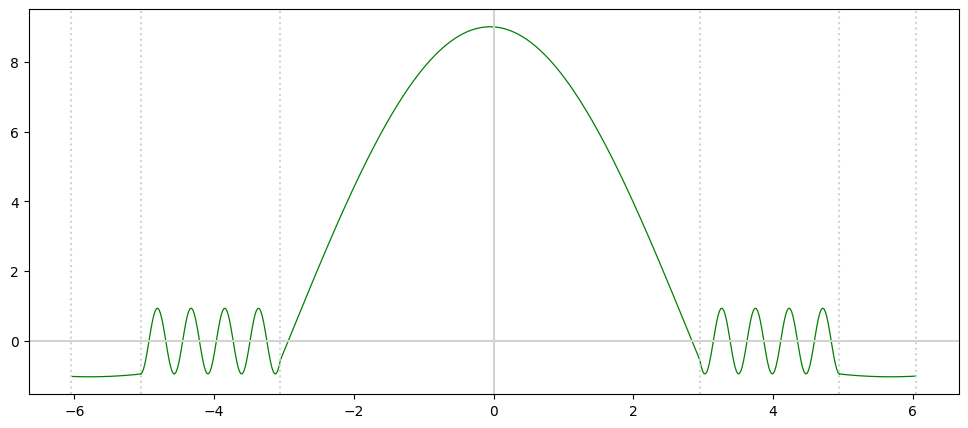

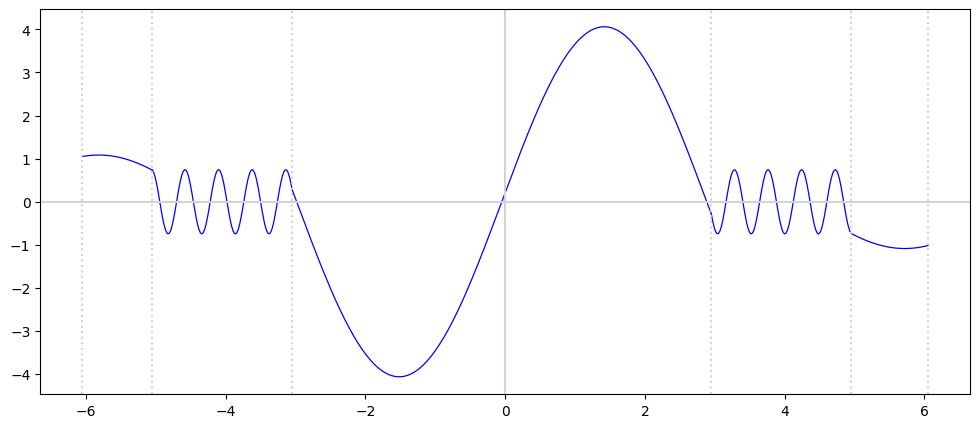

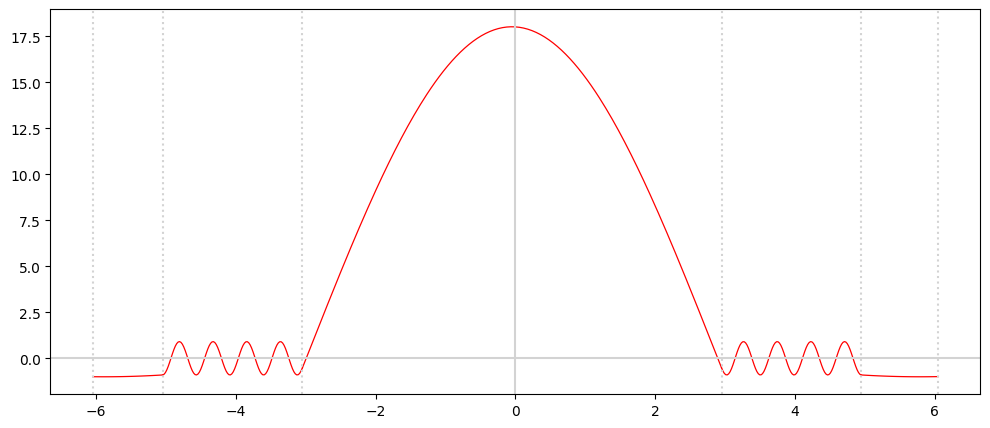

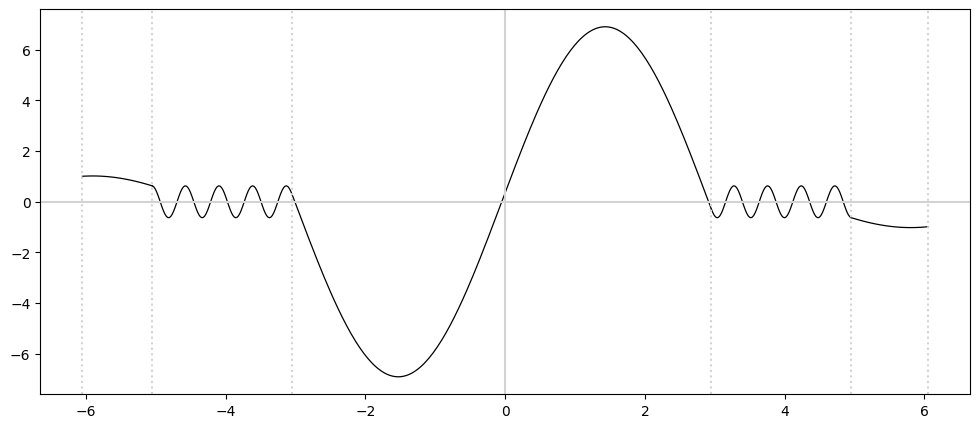

In [70]:
A.plot_field_1d(Fs1,plot_axis=True, linewidth=.9, color='g', label='TM_odd')
A.plot_field_1d(Fs2, plot_axis=True, linewidth=.9, color='b', label='TM_even')
A.plot_field_1d(Fs3, plot_axis=True, linewidth=.9, color='r', label='TE_odd')
A.plot_field_1d(Fs4, plot_axis=True, linewidth=.9, color='k', label='TE_even')

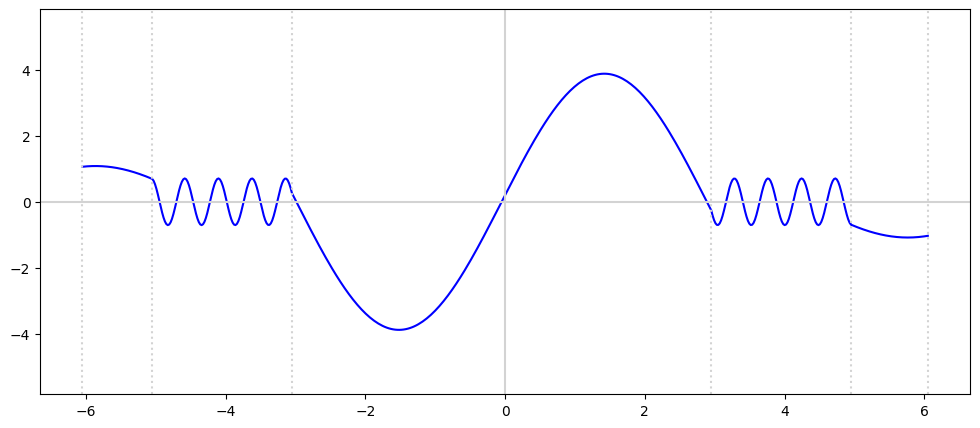

In [83]:
A.animate_field_1d(Fs2,'leaky')


In [187]:
Video('leaky'+'.mp4', html_attributes="controls loop autoplay")


The wave in the high index region is traveling inward laterally (in x).

In [85]:
M = A.coefficients(beta2)
M[1], np.abs(M[1]), np.angle(M[1])


(array([-0.29256106+0.30849234j, -0.34480597+0.37278065j]),
 array([0.4251582, 0.5077958]),
 array([2.3296951 , 2.31722983]))

The amplitudes are different, hence travelling.  Also there is a temporal shift since they have non opposite angles.

Let's look at what happens at a resonant input frequency.

In [186]:
n1, n2, A.wavelength

(1.0, 1.44, 5.180733538795448e-07)

In [144]:
# Formula for loss spikes from article

ms = np.arange(1,10,1)

n1 = A.ns[2]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = A.rhos[2] - A.rhos[1]

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls

array([4.14458683e-06, 2.07229342e-06, 1.38152894e-06, 1.03614671e-06,
       8.28917366e-07, 6.90764472e-07, 5.92083833e-07, 5.18073354e-07,
       4.60509648e-07])

In [145]:
A.wavelength=Ls[-2]

In [159]:
field_type = 'TM'
mode_type = 'leaky'
k_low = A.K_low

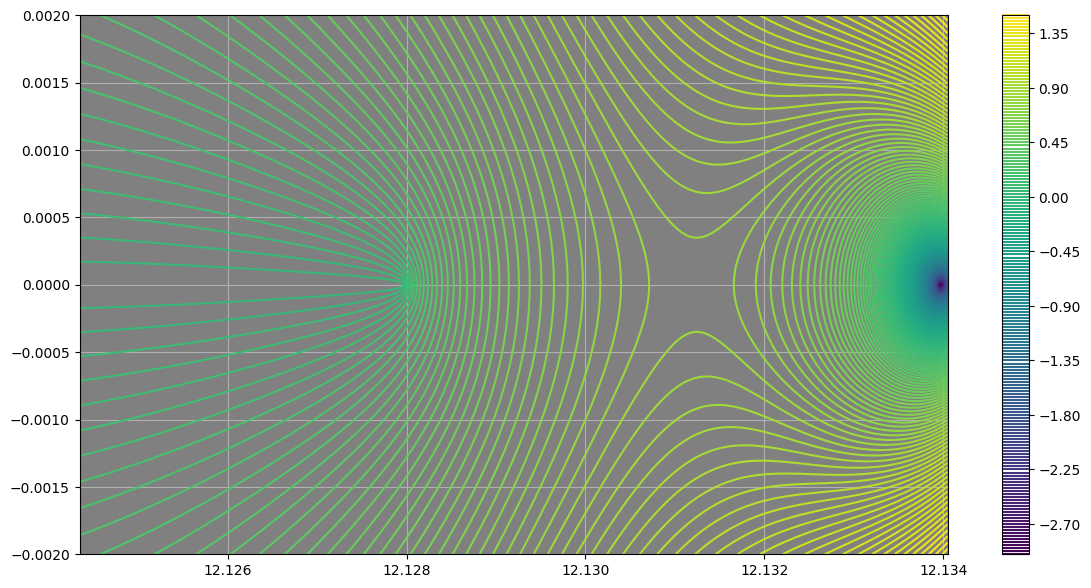

In [180]:
plotlogf(A.determinant, .9997*k_low, 1.0005*k_low, -.002, .002, field_type, mode_type, iref=200, rref=200,levels=200)

In [182]:
beta1 = newton(A.determinant, np.array([12.13-.01j]), args=('TM', mode_type))[0]
print(beta1, abs(A.determinant(beta1, 'TM', mode_type)))

beta2 = newton(A.determinant, np.array([12.105-.018j]), args=('TM', mode_type))[0]
print(beta2, abs(A.determinant(beta2, 'TM', mode_type)))

beta3 = newton(A.determinant, np.array([12.126-.005j]), args=('TE', mode_type))[0]
print(beta3, abs(A.determinant(beta3, 'TE', mode_type)))

beta4 = newton(A.determinant, np.array([12.105-.01j]), args=('TE', mode_type))[0]
print(beta4, abs(A.determinant(beta4, 'TE', mode_type)))

# beta1, beta2, beta3, beta4

(12.127120751331312-0.010301654495438189j) 1.0839678178900658e-12
(12.104270324685272-0.017228208368515265j) 1.2196966538757316e-12
(12.125805417869213-0.006734056912421645j) 7.927319817901925e-11
(12.105523637786032-0.009867778120971251j) 1.2981927029964964e-12


In [163]:
Fs1 = A.fields(beta1, field_type='TM', mode_type=mode_type)
Fs2 = A.fields(beta2, field_type='TM', mode_type=mode_type)
Fs3 = A.fields(beta3, field_type='TE', mode_type=mode_type)
Fs4 = A.fields(beta4, field_type='TE', mode_type=mode_type)

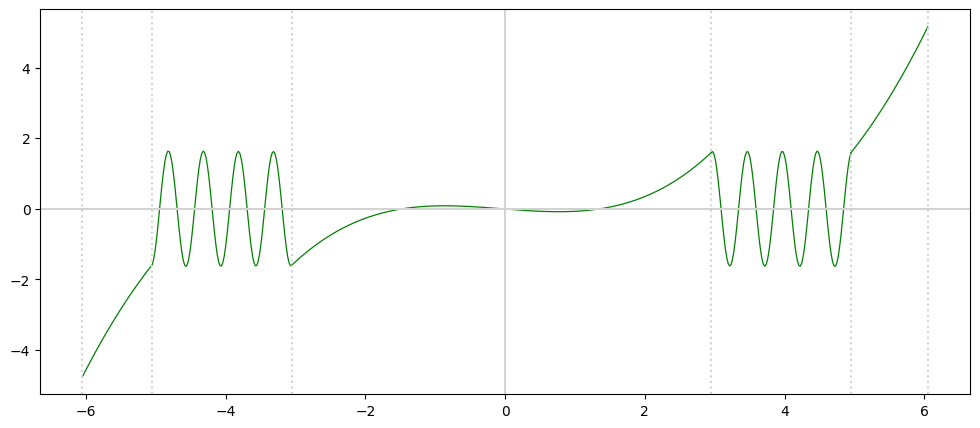

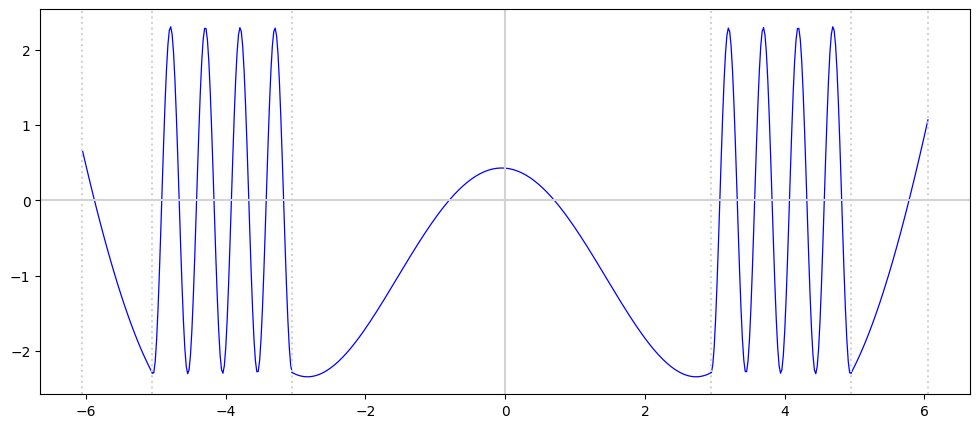

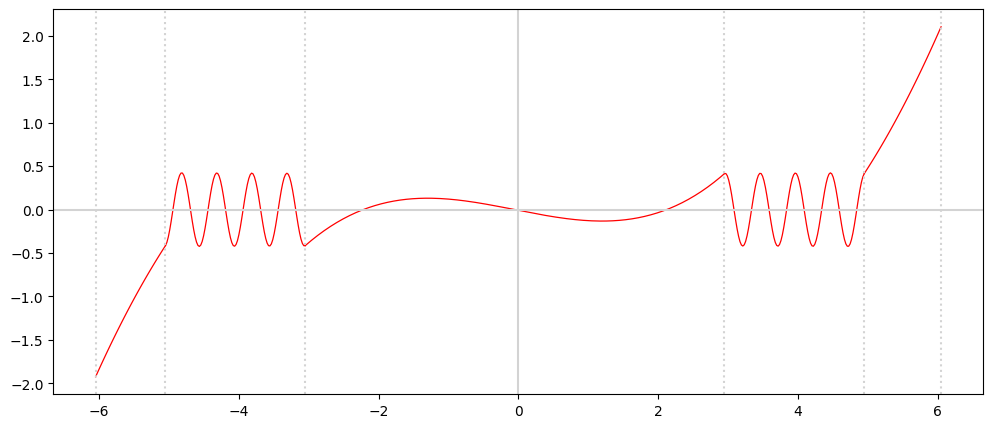

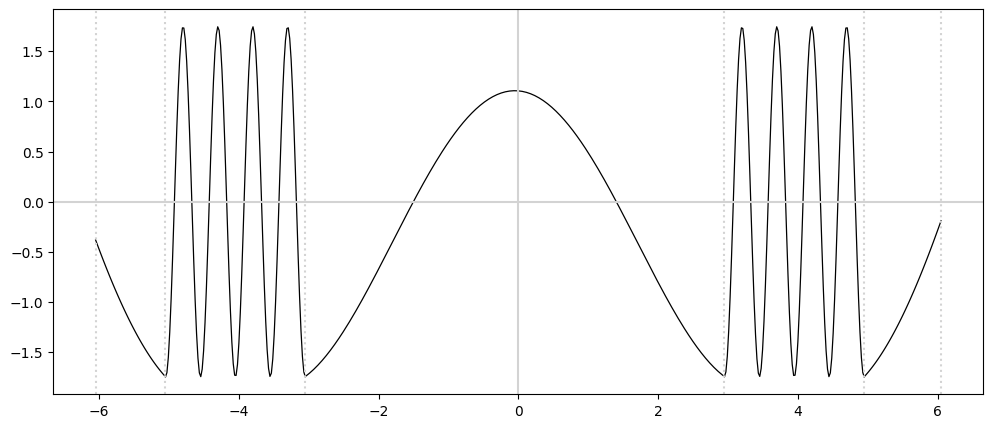

In [164]:
A.plot_field_1d(Fs1,plot_axis=True, linewidth=.9, color='g', label='TM_odd')
A.plot_field_1d(Fs2, plot_axis=True, linewidth=.9, color='b', label='TM_even')
A.plot_field_1d(Fs3, plot_axis=True, linewidth=.9, color='r', label='TE_odd')
A.plot_field_1d(Fs4, plot_axis=True, linewidth=.9, color='k', label='TE_even')

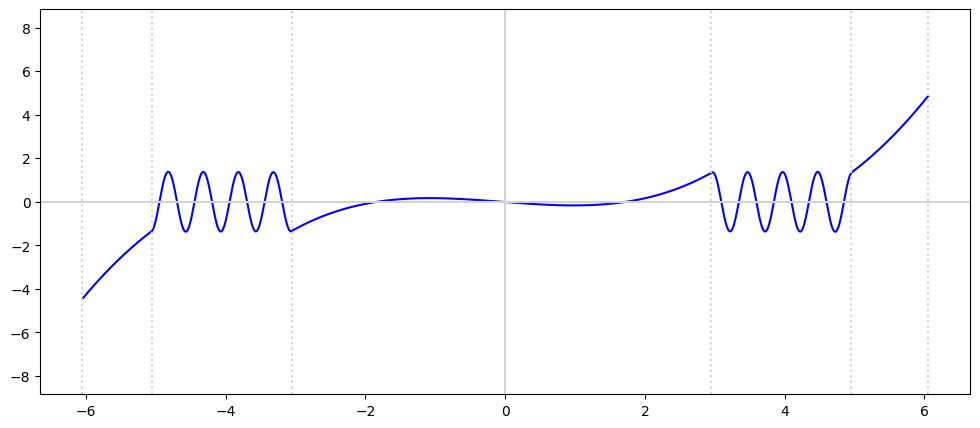

In [174]:
A.animate_field_1d(Fs1,'leaky2')


In [176]:
M = A.coefficients(beta2)
M[1], np.abs(M[1]), np.angle(M[1])


(array([ 0.00666914-0.11558518j, -0.15290385-0.02816682j]),
 array([0.11577742, 0.15547655]),
 array([-1.51316132, -2.9594223 ]))

In [1]:
Video('leaky2'+'.mp4', html_attributes="controls loop autoplay")


NameError: name 'Video' is not defined